# Predicting the Sale Price of a Bulldozer using Time-Series Data

**In this mini Data Science project, I sought to develop a model that can predict the price of a Bulldozer today using historical data.**  

**This is essentially my attempt at the "Bluebook for Bulldozers Kaggle Competition" that was completed in late 2012.**

## 1. Problem Definition
**This analysis was approached from the point of view of a company wanting to sell it inventory of used bulldozers at auctions around the USA.**  

The analysis seeks to answer the following business questions:-  
### 1.1 Business Questions
#### 1.1.1 For bulldozers of similar age , usage and model type, is their sale price  dependant on where / what State the bulldozer is sold from ? If so , in which State can we expect to get the best price for our bulldozer ?
#### 1.1.2 What is the sale price variation across diffferent bulldozer models of the same age and usage ?
#### 1.1.3 What is the "best" time of the year to sell a bulldozer on average ?
### 1.2 Modelling Objective
#### 1.2.1 How much can we expect to get for the sale of a particular bulldozer ? Can we build a predictive model to determine what is the appropriate sale price of certain bulldozers ? 
> How well can my model predict the future sale price of a bulldozer, given certain characteristics, using historical data indicating how much similar bulldozers sold for.

## 2. Data
The data is downloaded from the "Kaggle Bluebook for Bulldozers Competition"

Link to the kaggle page : https://www.kaggle.com/c/bluebook-for-bulldozers/data   

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012.   

The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale  

The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).  

**Refer to the data dictionary for more detialed descriptions of each feature in the aforementioned datasets.**

## 3. Evaluation

The evaluation metrics used for determining the accauracy and reliability of the sale price predictive model will be  the `MAE` **(Mean Absolute Error)** between the actual and the predicted auction sale prices and the `R^2 score`.

### Goal
- **Minimise the RMSLE**
- **Maximise the R^2 score**


## 4. Features

**Refer to the data dictionary for more detialed descriptions of each feature in the aforementioned datasets.**

**Link to the Data Dicitonary here** -> https://drive.google.com/file/d/137C96v4USPF__97pBNIJ1AaKBkJsOJuB/view?usp=sharing



## 5. Initial Data Exploration & Analysis

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 60)

### Parsing the Dates

Since the dates are of type `object` , we need to parse the dates so that we can encode the dates as `datetime` objects in order to use them for the data analysis and training.  

We can do this by passing the `parse_dates` paramerter when importing the data.

In [4]:
# Data import
# Training and Validation Sets
df = pd.read_csv("data/TrainAndValid.csv", low_memory = False, parse_dates=["saledate"])

In [5]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Getting some information about the data types of the feature variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [7]:
# Getting some statistical information about the dataset
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


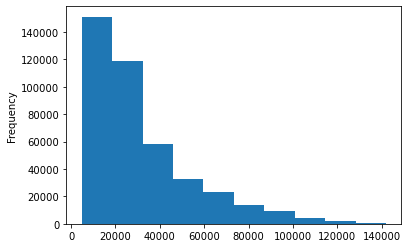

In [8]:
# Viewing the distribution of Bulldozer Sale Prices
df.SalePrice.plot.hist(bins=10);

In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter'],
      dtype='object')

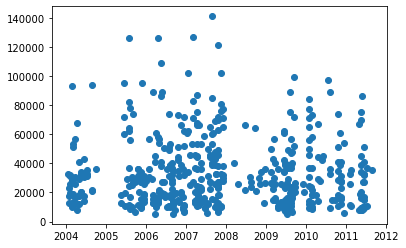

In [10]:
# Visualizing the relationship between sale date and sale prices of the bulldozers
fig, ax = plt.subplots()
ax.scatter(df.saledate[:500], df.SalePrice[:500]);

### Sorting the dataframe by saledate
When working with time series data, it's a good idea to sort it by date.

In [11]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [13]:
# Making a copy of the original dataframe
df_copy = df.copy()

## 6. Feature Engineering 
### 1. Creating a new `Age_at_Sale` column representing the age of the bulldozer in years , when it was sold.
### 2. Creating a `saleyear` , `salemonth`, `saleday` & `saleDayOfWeek` columns by adding datetime parameters for `saledate` column

In [14]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayOfWeek"] = df.saledate.dt.dayofweek

### I limited the dataframe to only include bulldozers made starting 1980 onwards

In [15]:
df = df[df['YearMade'] >= 1980]

In [16]:
df['Age_at_Sale'] = df['saleYear'] - df['YearMade']

In [17]:
#Dropping the saledate column
df.drop("saledate", axis=1, inplace=True)

In [18]:
#Dropping the yearmade column since its value is better encapsulated by the age(years) column
df.drop('YearMade', axis=1, inplace=True)

In [19]:
# Viewing the new dataframe
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,Age_at_Sale
274835,1821514,14000.0,1194089,10150,132,99.0,NaN,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,9
212552,1671174,16000.0,1327630,8591,132,99.0,NaN,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,9
62755,1329056,22000.0,1336053,4089,132,99.0,NaN,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,5
81383,1379228,31000.0,1082797,7620,132,99.0,NaN,NaN,IT12,IT12,NaN,NaN,NaN,Compact,Wheel Loader - 60.0 to 80.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,3
135376,1493279,63000.0,1363756,2759,132,99.0,NaN,NaN,D5HII,D5,H,II,NaN,Medium,"Track Type Tractor, Dozer - 130.0 to 160.0 Hor...",Florida,TTT,Track Type Tractors,NaN,EROPS,NaN,NaN,NaN,NaN,Powershift,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,2


## Quantitative Feature Importance Analysis
### Correlation Matrix

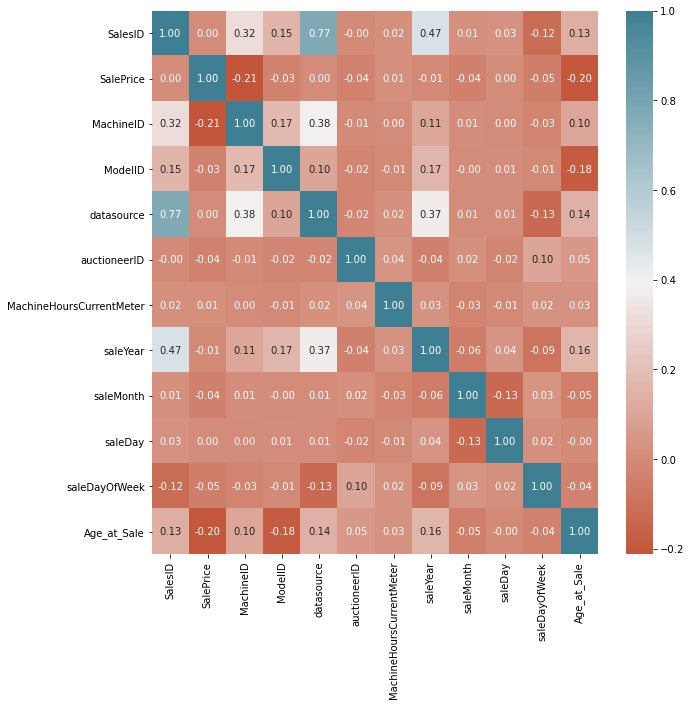

In [20]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt='.2f');
plt.show();

The correlation matirx analysis reveals that :-
1. Sale price is expectedly **negatively correlated** with the age of the bulldozer.
2. Sale price is strongly, negatively correlated with the MachineID of the bulldozer.
3. The day of the week that a bulldozer was sold for affected its sale price to some extent.

In [21]:
# checking for missing values among the numerical features
num_cols = df.select_dtypes(include=['int64', 'float64'])
num_cols.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayOfWeek,Age_at_Sale
274835,1821514,14000.0,1194089,10150,132,99.0,NaN,1989,1,31,1,9
212552,1671174,16000.0,1327630,8591,132,99.0,NaN,1989,1,31,1,9
62755,1329056,22000.0,1336053,4089,132,99.0,NaN,1989,1,31,1,5
81383,1379228,31000.0,1082797,7620,132,99.0,NaN,1989,1,31,1,3
135376,1493279,63000.0,1363756,2759,132,99.0,NaN,1989,1,31,1,2


In [22]:
num_nan_df = (num_cols.isnull().sum() / num_cols.shape[0]).reset_index()
num_nan_df.columns = ['Feature', 'nan_proportion']
num_nan_df.sort_values(by='nan_proportion', ascending=False, inplace=True)
num_nan_df

,Feature,nan_proportion
6,MachineHoursCurrentMeter,0.625440
5,auctioneerID,0.050495
0,SalesID,0.000000
1,SalePrice,0.000000
2,MachineID,0.000000
3,ModelID,0.000000
4,datasource,0.000000
7,saleYear,0.000000
8,saleMonth,0.000000
9,saleDay,0.000000


### Quantitative features to drop from the analysis
I also decided to drop the following columns for the following reasons: 
1. **saleYear** - Since the `Age_at_Sale` feature captures the value brought about by the saleYear, I proceeded to drop the `saleYear` column from the dataframe.  

2. **saleDay** - This column had a near zero correlation with the sale price.  

3. **datasource** - this column is not valuable to the analysis of the data with regard to the business questions.  

4. **auctioneerID** - this was the ID given to the particular auctioneer during the sale of the bulldozer and thus, has no material signifacance towards answering any of the business questions nor is it relevant for developing a predicitive model.  

5. **salesID** - similar reasons as the auctioneerID.

In [23]:
df.drop(['saleYear', 'saleDay', 'datasource', 'auctioneerID', 'SalesID'], axis=1, inplace=True)

In [24]:
# Sale Price vs MachineHoursCurrentMeter
machine_usage_data = df.groupby(['MachineHoursCurrentMeter']).mean()['SalePrice'].reset_index()
machine_usage_data.sort_values(by='MachineHoursCurrentMeter', ascending=True, inplace=True)
machine_usage_data

,MachineHoursCurrentMeter,SalePrice
0,0.0,34457.494332
1,1.0,21500.000000
2,2.0,23652.777778
3,3.0,28765.714286
4,4.0,36820.342857
...,...,...
14476,1728600.0,27000.000000
14477,1729600.0,22000.000000
14478,1857100.0,12000.000000
14479,2202400.0,12000.000000


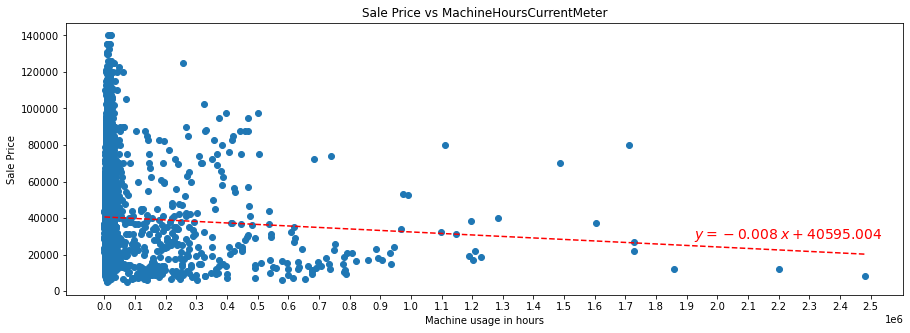

In [25]:
# Plotting sale price as a function of machinehourscurrentmeter
fig, ax = plt.subplots(figsize=(15,5))
plt.scatter(machine_usage_data['MachineHoursCurrentMeter'], machine_usage_data['SalePrice'])
plt.xlabel('Machine usage in hours')
plt.xticks(np.arange(min(machine_usage_data['MachineHoursCurrentMeter']), max(machine_usage_data['MachineHoursCurrentMeter'])+50000, 100000))
plt.ylabel('Sale Price')
plt.title('Sale Price vs MachineHoursCurrentMeter')

# Adding a trendline to the scatter plot
z = np.polyfit(machine_usage_data['MachineHoursCurrentMeter'], machine_usage_data['SalePrice'], 1)
y_hat = np.poly1d(z)
plt.plot(machine_usage_data['MachineHoursCurrentMeter'], y_hat(machine_usage_data['MachineHoursCurrentMeter']), "r--")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$"
plt.gca().text(0.75, 0.25, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top', color='r')

plt.show();


The scatter plot and trendline illustrated above indicate that the sale price is `negatively correlated` to the machien usage hours.  
**This aligns with our commonsense  that tells us that the more bulldozer has been used the lower its value is due to wear and tear from the usage.**

## Categorical feature importance analysis

In [26]:
# Viewing the Categorical features
cat_cols = df.select_dtypes(include=['object'])
cat_cols.head()

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
274835,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
212552,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
81383,NaN,IT12,IT12,NaN,NaN,NaN,Compact,Wheel Loader - 60.0 to 80.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,NaN,D5HII,D5,H,II,NaN,Medium,"Track Type Tractor, Dozer - 130.0 to 160.0 Hor...",Florida,TTT,Track Type Tractors,NaN,EROPS,NaN,NaN,NaN,NaN,Powershift,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Categorical feature choice methodology
I determined which categorical features to keep and drop based on the followinf filters :
- Proportion of empty entries -> If a column had more than 50% of the values missing , then I dropped the column.
- Statistical significance -> Determining if there is some correlation between the categorical features and the sale price through bar plots.
- Intuitive filtering -> Finally I was use my subjective criteria to determine which categorical features to keep based on the descriptions in the data dictionary.

In [27]:
# Checking for missing values in the categorical df
cat_nan_df = (cat_cols.isnull().sum() / cat_cols.shape[0]).reset_index()
cat_nan_df.columns = ['Feature', 'nan_proportion']
cat_nan_df.sort_values(by='nan_proportion', ascending=False, inplace=True)
cat_nan_df

,Feature,nan_proportion
22,Engine_Horsepower,0.954084
19,Blade_Extension,0.954084
27,Tip_Control,0.954084
24,Pushblock,0.954084
21,Enclosure_Type,0.954084
20,Blade_Width,0.954084
26,Scarifier,0.954072
32,Hydraulics_Flow,0.878835
31,Grouser_Tracks,0.878835
30,Coupler_System,0.878652


In [28]:
## Sale Price vs UsageBand
cat_usage_data = df.groupby(['UsageBand']).mean()['SalePrice'].reset_index()
cat_usage_data.sort_values(by='SalePrice', ascending=False, inplace=True)
cat_usage_data

,UsageBand,SalePrice
0,High,44882.582305
2,Medium,37244.585560
1,Low,29426.284403


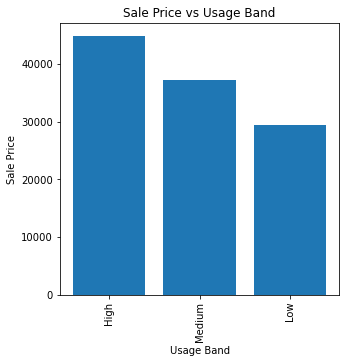

In [29]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(cat_usage_data['UsageBand'], cat_usage_data['SalePrice'])
plt.xticks(rotation=90)
plt.xlabel('Usage Band')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Usage Band')
plt.show();

This result is somewhat confusing since it implies that the more usage a bulldozer has, the higher its average sale price was.  
This contradicts the results from the analysis done on the corrrlation between the number of hours a bulldozer had been used and its sale price.

In [30]:
# Sale Price vs Bulldozer Class
# The bulldozer class refers to the type of bulldozer
class_data = df.groupby(['ProductGroupDesc', ]).mean()['SalePrice'].reset_index()
class_data.sort_values(by='SalePrice', ascending=False, inplace=True)
class_data

,ProductGroupDesc,SalePrice
1,Motor Graders,62602.378974
5,Wheel Loader,42892.507968
4,Track Type Tractors,41435.559670
3,Track Excavators,38214.954243
0,Backhoe Loaders,21607.620500
2,Skid Steer Loaders,10742.320320


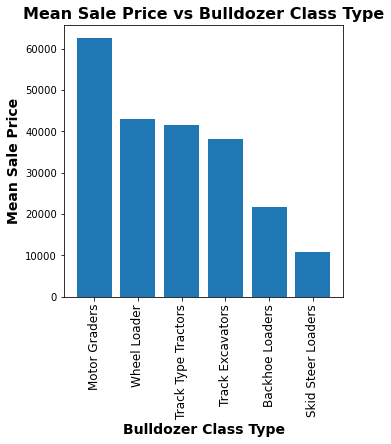

In [31]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(class_data['ProductGroupDesc'], class_data['SalePrice'])
plt.xlabel('Bulldozer Class Type', size=14, weight='bold')
plt.xticks(rotation=90, size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price vs Bulldozer Class Type', size=16, weight='bold')
plt.show();

The analysis above clearly shows us a general trend in the mean sale prices of various types of bulldozer class types

In [32]:
# Sale Price vs State
# The state column represented the state that the sale occurred in
state_data = df.groupby(['state']).mean()['SalePrice'].reset_index()
state_data.sort_values(by='SalePrice', ascending=False, inplace=True)
state_data.head()

,state,SalePrice
33,North Dakota,50195.068027
41,South Dakota,48015.183246
50,West Virginia,43365.709970
39,Rhode Island,41613.846154
0,Alabama,38592.447667


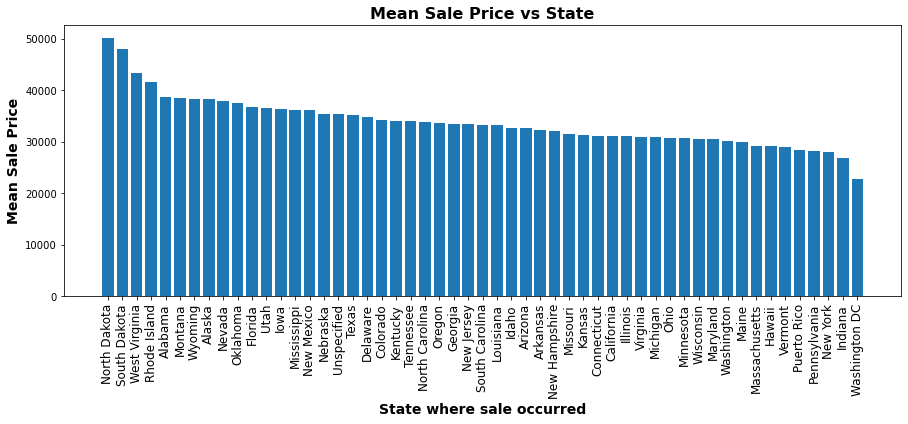

In [33]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(state_data['state'], state_data['SalePrice'])
plt.xlabel('State where sale occurred', size=14, weight='bold')
plt.xticks(rotation=90, size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price vs State', size=16, weight='bold')
plt.show();

The analysis above clearly demonstrates a correlation between the sale price and the state location in which the sale was done.

### Analysing the sale price trends in the various states for the `Motor Graders` bulldozer type

In [34]:
motor_graders = df[df['ProductGroupDesc'] == 'Motor Graders'][['SalePrice', 'state']]
motor_graders.head()

,SalePrice,state
144952,85000.0,Florida
99186,85000.0,Florida
235744,27000.0,Florida
99489,84000.0,Florida
144915,69000.0,Florida


In [35]:
# Mean sale price of motor graders per state
mg_data = motor_graders.groupby(['state']).mean()['SalePrice'].reset_index()
mg_data.sort_values(by='SalePrice', ascending=False, inplace=True)
mg_data.head()

,state,SalePrice
39,South Dakota,91078.947368
32,North Dakota,76297.619048
37,Rhode Island,76000.000000
26,Nevada,74653.089888
2,Arizona,74395.228216


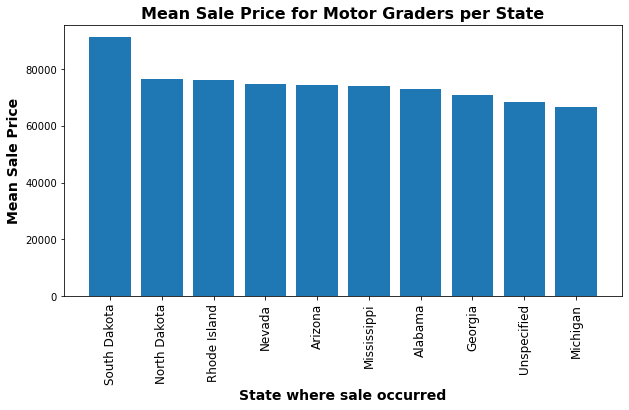

In [36]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(mg_data['state'][:10], mg_data['SalePrice'][:10])
plt.xlabel('State where sale occurred', size=14, weight='bold')
plt.xticks(rotation=90, size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Motor Graders per State', size=16, weight='bold')
plt.show();

### Analysing the sale price trends in the various states for the `Wheel Loader` bulldozer class type

In [37]:
wheel_loader = df[df['ProductGroupDesc'] == 'Wheel Loader'][['SalePrice', 'state']]
wheel_loader.head()

,SalePrice,state
274835,14000.0,Florida
212552,16000.0,Florida
81383,31000.0,Florida
67974,70000.0,Florida
31494,17000.0,Florida


In [38]:
# Mean sale price of wheel loaders per state
wl_data = wheel_loader.groupby(['state']).mean()['SalePrice'].reset_index()
wl_data.sort_values(by='SalePrice', ascending=False, inplace=True)
wl_data.head()

,state,SalePrice
39,Rhode Island,60131.578947
33,North Dakota,57055.555556
25,Montana,52135.761589
27,Nevada,49261.904762
7,Delaware,49159.090909


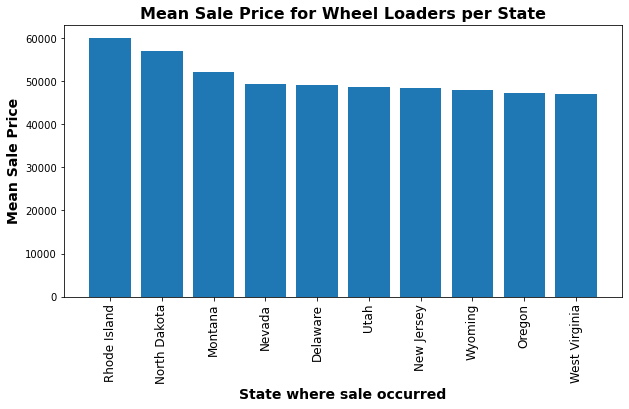

In [39]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(wl_data['state'][:10], wl_data['SalePrice'][:10])
plt.xlabel('State where sale occurred', size=14, weight='bold')
plt.xticks(rotation=90, size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Wheel Loaders per State', size=16, weight='bold')
plt.show();

### Analysing the sale price trends in the various states for the `Track type Tractors` bulldozer class type

In [40]:
tractors = df[df['ProductGroupDesc'] == 'Track Type Tractors'][['SalePrice', 'state']]
tractors.head()

,SalePrice,state
62755,22000.0,Florida
135376,63000.0,Florida
53101,49000.0,Florida
134119,50000.0,Florida
119449,120000.0,Florida


In [41]:
# Mean sale price of tractors per state
ttt_data = tractors.groupby(['state']).mean()['SalePrice'].reset_index()
ttt_data.sort_values(by='SalePrice', ascending=False, inplace=True)
ttt_data.head()

,state,SalePrice
27,Nevada,61949.430199
33,North Dakota,59656.250000
45,Utah,53660.098522
2,Arizona,52797.872340
30,New Mexico,52631.274131


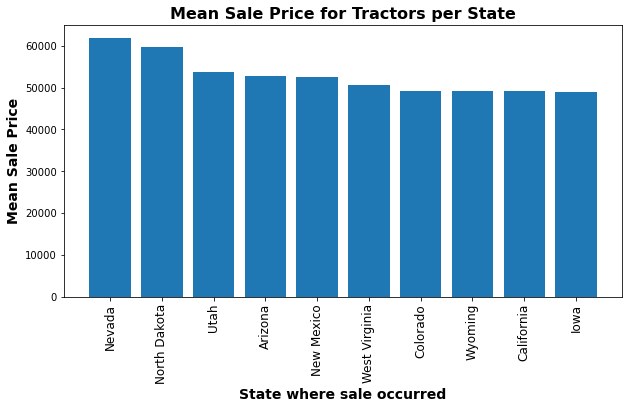

In [42]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(ttt_data['state'][:10], ttt_data['SalePrice'][:10])
plt.xlabel('State where sale occurred', size=14, weight='bold')
plt.xticks(rotation=90, size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Tractors per State', size=16, weight='bold')
plt.show();

### Analysing the sale price trends in the various states for the `Track Excavator` bulldozer class type

In [43]:
excavators = df[df['ProductGroupDesc'] == 'Track Excavators'][['SalePrice', 'state']]
excavators.head()

,SalePrice,state
67034,110000.0,Florida
87602,41000.0,Florida
66337,50000.0,Florida
152689,72000.0,Florida
88803,39000.0,Florida


In [44]:
# Mean sale price of excavators per state
ex_data = excavators.groupby(['state']).mean()['SalePrice'].reset_index()
ex_data.sort_values(by='SalePrice', ascending=False, inplace=True)
ex_data.head()

,state,SalePrice
33,North Dakota,49150.793651
41,South Dakota,48818.181818
50,West Virginia,44883.974359
14,Iowa,44325.812274
0,Alabama,43882.631063


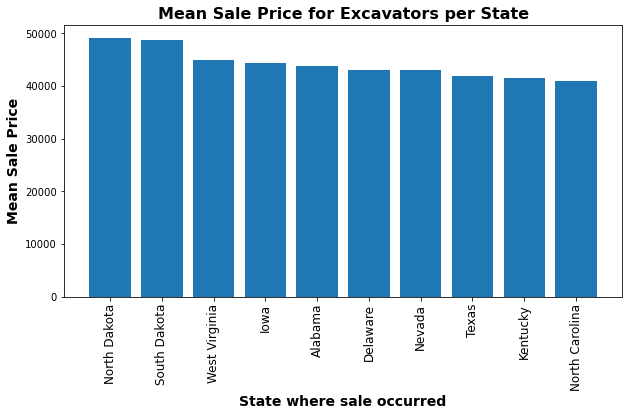

In [45]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(ex_data['state'][:10], ex_data['SalePrice'][:10])
plt.xlabel('State where sale occurred', size=14, weight='bold')
plt.xticks(rotation=90, size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Excavators per State', size=16, weight='bold')
plt.show();

### Analysing the sale price trends in the various states for the `Backhoe Loader` bulldozer class type

In [46]:
bloader = df[df['ProductGroupDesc'] == 'Backhoe Loaders'][['SalePrice', 'state']]
bloader.head()

,SalePrice,state
32138,20000.0,Florida
92833,34000.0,Florida
32317,21000.0,Florida
92780,26250.0,Florida
92256,21500.0,Florida


In [47]:
# Mean sale price of Backhoe Loaders per state
bl_data = bloader.groupby(['state']).mean()['SalePrice'].reset_index()
bl_data.sort_values(by='SalePrice', ascending=False, inplace=True)
bl_data.head()

,state,SalePrice
41,South Dakota,27900.000000
39,Rhode Island,25954.545455
44,Unspecified,24976.074499
27,Nevada,23369.014085
8,Florida,23260.189523


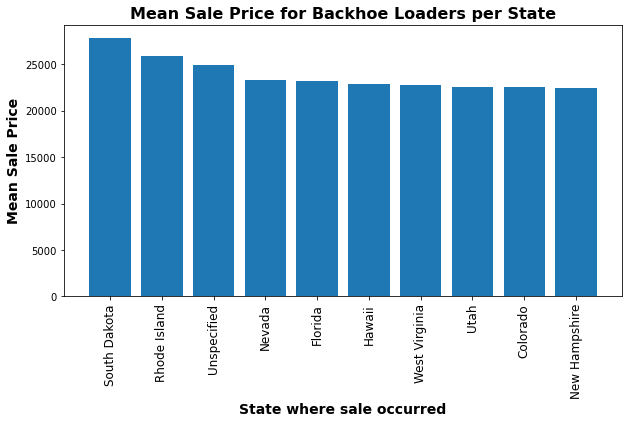

In [48]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(bl_data['state'][:10], bl_data['SalePrice'][:10])
plt.xlabel('State where sale occurred', size=14, weight='bold')
plt.xticks(rotation=90, size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Backhoe Loaders per State', size=16, weight='bold')
plt.show();

### Analysing the sale price trends in the various states for the `Skid Steer Loader` bulldozer class type

In [49]:
ssl = df[df['ProductGroupDesc'] == 'Skid Steer Loaders'][['SalePrice', 'state']]
ssl.head()

,SalePrice,state
163822,17000.0,Minnesota
161419,10500.0,Florida
172032,17500.0,Florida
163832,17000.0,Georgia
204440,18000.0,Maryland


In [50]:
# Mean sale price of Skid Steer Loaders per state
ssl_data = ssl.groupby(['state']).mean()['SalePrice'].reset_index()
ssl_data.sort_values(by='SalePrice', ascending=False, inplace=True)
ssl_data.head()

,state,SalePrice
39,Rhode Island,13400.000000
44,Unspecified,12964.555256
33,North Dakota,12875.000000
15,Kansas,12418.333333
20,Massachusetts,12368.055556


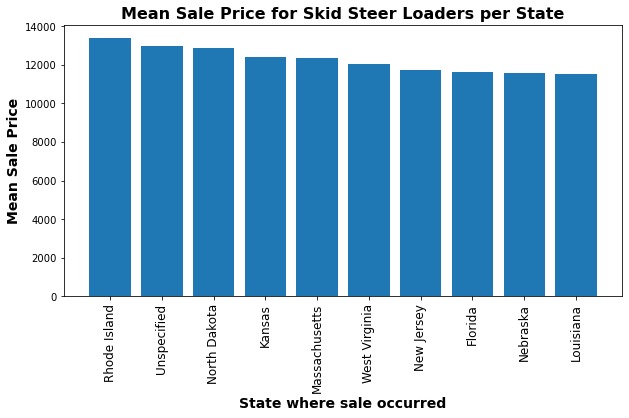

In [51]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(ssl_data['state'][:10], ssl_data['SalePrice'][:10])
plt.xlabel('State where sale occurred', size=14, weight='bold')
plt.xticks(rotation=90, size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Skid Steer Loaders per State', size=16, weight='bold')
plt.show();

### Answering the 1st Business Question...
#### For bulldozers of similar age , usage and model type, is their sale price  dependant on where / what State the bulldozer is sold from ? If so , in which State can we expect to get the best price for our bulldozer ?  

The analysis of the mean sale price for each bulldozer type revealed that:  

- Generally speaking, it would be more advisable for the company to sell their bulldozers in **North Dakota**. This is beacuase **bulldozers sell for a higher price , on average in North Dakota**.  

- **For Motor Graders**: The best state to sell in is **South Dakota**.
- **For Wheel Loaders**: The best state to sell in is **Rhode Island**.
- **For Tractors**: The best state to sell in is **Nevada**.
- **For Excavators**: The best state to sell in is **North Dakota**.
- **For Backhoe Loaders**: The best state to sell in is **South Dakota**.
- **For Skid Steer Loaders**: The best state to sell in is **Rhode Island**.

### Analysing the relationship between the age of the bulldozer at sale vs the sale price

In [52]:
df = df[df['Age_at_Sale'] >= 0]

In [53]:
age_data = df.groupby(['Age_at_Sale']).mean()['SalePrice'].reset_index()
age_data

,Age_at_Sale,SalePrice
0,0,42340.402194
1,1,48358.855909
2,2,44886.068989
3,3,42986.058212
4,4,38993.807891
5,5,35712.830330
6,6,34349.009060
7,7,33518.947857
8,8,32309.283033
9,9,30839.962524


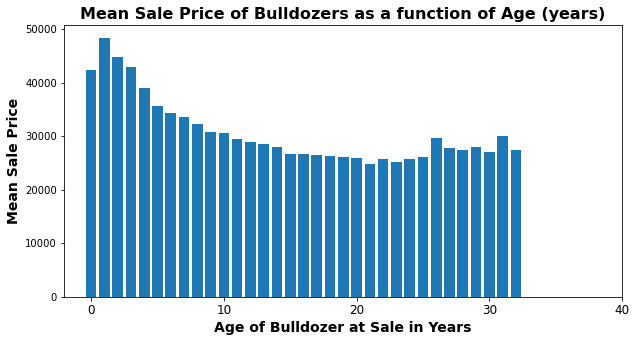

In [54]:
# Plotting the same 
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(age_data['Age_at_Sale'], age_data['SalePrice'])
plt.xlabel('Age of Bulldozer at Sale in Years', size=14, weight='bold')
plt.xticks(np.arange(min(age_data['Age_at_Sale']), max(age_data['Age_at_Sale'])+10, 10))
plt.xticks(size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price of Bulldozers as a function of Age (years)', size=16, weight='bold')
plt.show();

In [55]:
age_data = df.groupby(['Age_at_Sale', 'ProductGroupDesc']).mean()['SalePrice'].reset_index()
age_data

,Age_at_Sale,ProductGroupDesc,SalePrice
0,0,Backhoe Loaders,27585.616438
1,0,Motor Graders,102961.538462
2,0,Skid Steer Loaders,13896.118721
3,0,Track Excavators,65916.000000
4,0,Track Type Tractors,75725.000000
5,0,Wheel Loader,70576.923077
6,1,Backhoe Loaders,30324.568289
7,1,Motor Graders,108668.000000
8,1,Skid Steer Loaders,14816.902655
9,1,Track Excavators,60626.067825


## Visualising the sale price trends across bulldozers of the same class type and different ages
#### Focusing on Motor Graders

In [56]:
age_data_mg = age_data[age_data['ProductGroupDesc'] == 'Motor Graders']
age_data_mg.head()

,Age_at_Sale,ProductGroupDesc,SalePrice
1,0,Motor Graders,102961.538462
7,1,Motor Graders,108668.000000
13,2,Motor Graders,104011.210762
19,3,Motor Graders,102824.064171
25,4,Motor Graders,95216.216216


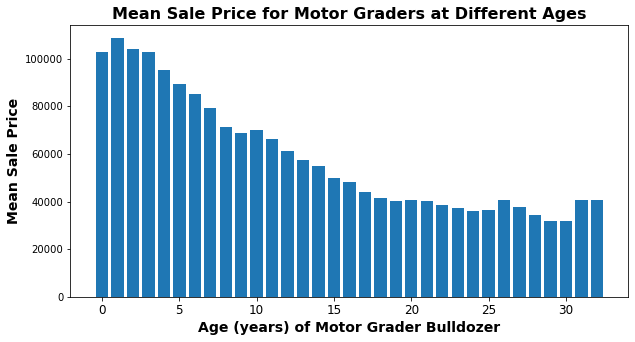

In [57]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(age_data_mg['Age_at_Sale'], age_data_mg['SalePrice'])
plt.xlabel('Age (years) of Motor Grader Bulldozer', size=14, weight='bold')
plt.xticks(size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Motor Graders at Different Ages', size=16, weight='bold')
plt.show();

#### Focusing on Wheel Loaders

In [58]:
age_data_wl = age_data[age_data['ProductGroupDesc'] == 'Wheel Loader']
age_data_wl.head()

,Age_at_Sale,ProductGroupDesc,SalePrice
5,0,Wheel Loader,70576.923077
11,1,Wheel Loader,73664.245810
17,2,Wheel Loader,66619.003021
23,3,Wheel Loader,60230.132896
29,4,Wheel Loader,53682.039795


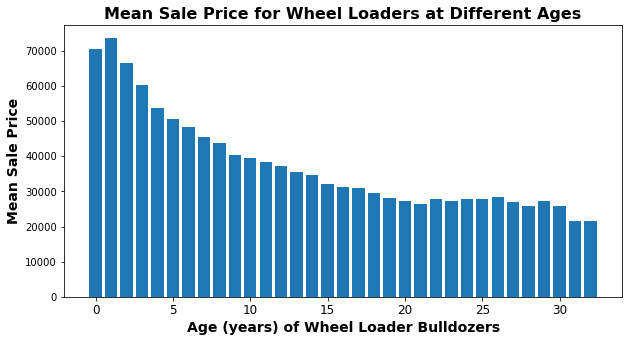

In [59]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(age_data_wl['Age_at_Sale'], age_data_wl['SalePrice'])
plt.xlabel('Age (years) of Wheel Loader Bulldozers', size=14, weight='bold')
plt.xticks(size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Wheel Loaders at Different Ages', size=16, weight='bold')
plt.show();

#### Focusing on Tractors

In [60]:
age_data_ttt = age_data[age_data['ProductGroupDesc'] == 'Track Type Tractors']
age_data_ttt.head()

,Age_at_Sale,ProductGroupDesc,SalePrice
4,0,Track Type Tractors,75725.000000
10,1,Track Type Tractors,65985.564304
16,2,Track Type Tractors,61377.103673
22,3,Track Type Tractors,56955.303525
28,4,Track Type Tractors,50351.349248


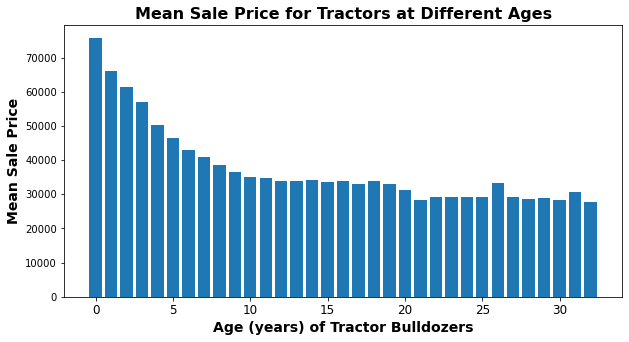

In [61]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(age_data_ttt['Age_at_Sale'], age_data_ttt['SalePrice'])
plt.xlabel('Age (years) of Tractor Bulldozers', size=14, weight='bold')
plt.xticks(size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Tractors at Different Ages', size=16, weight='bold')
plt.show();

#### Focusing on Excavators

In [62]:
age_data_ex = age_data[age_data['ProductGroupDesc'] == 'Track Excavators']
age_data_ex.head()

,Age_at_Sale,ProductGroupDesc,SalePrice
3,0,Track Excavators,65916.000000
9,1,Track Excavators,60626.067825
15,2,Track Excavators,55304.948755
21,3,Track Excavators,52097.450361
27,4,Track Excavators,48528.002092


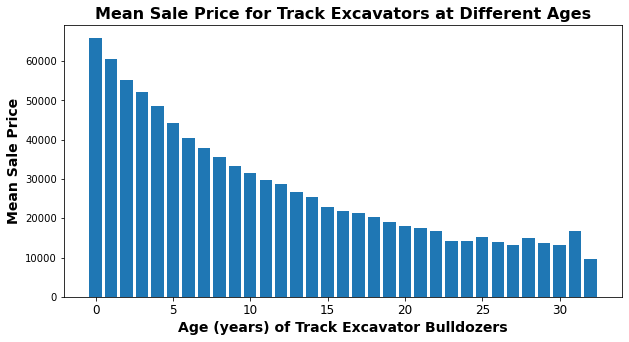

In [63]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(age_data_ex['Age_at_Sale'], age_data_ex['SalePrice'])
plt.xlabel('Age (years) of Track Excavator Bulldozers', size=14, weight='bold')
plt.xticks(size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Track Excavators at Different Ages', size=16, weight='bold')
plt.show();

#### Focusing on Backhoe Loaders

In [64]:
age_data_bl = age_data[age_data['ProductGroupDesc'] == 'Backhoe Loaders']
age_data_bl.head()

,Age_at_Sale,ProductGroupDesc,SalePrice
0,0,Backhoe Loaders,27585.616438
6,1,Backhoe Loaders,30324.568289
12,2,Backhoe Loaders,30022.115006
18,3,Backhoe Loaders,28793.854939
24,4,Backhoe Loaders,26354.501334


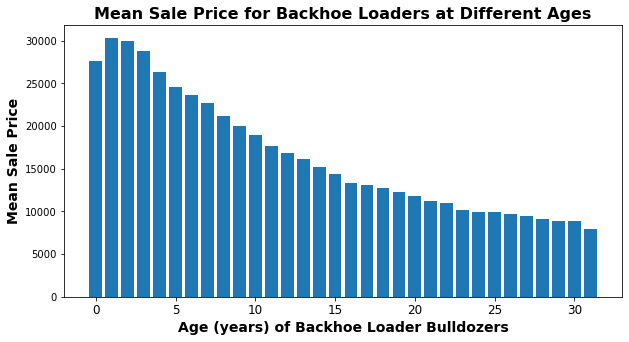

In [65]:
# Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(age_data_bl['Age_at_Sale'], age_data_bl['SalePrice'])
plt.xlabel('Age (years) of Backhoe Loader Bulldozers', size=14, weight='bold')
plt.xticks(size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Backhoe Loaders at Different Ages', size=16, weight='bold')
plt.show();

#### Focusing on Skid Steer Loaders

In [66]:
age_data_ssl = age_data[age_data['ProductGroupDesc'] == 'Skid Steer Loaders']
age_data_ssl.head()

,Age_at_Sale,ProductGroupDesc,SalePrice
2,0,Skid Steer Loaders,13896.118721
8,1,Skid Steer Loaders,14816.902655
14,2,Skid Steer Loaders,13859.425620
20,3,Skid Steer Loaders,12907.358470
26,4,Skid Steer Loaders,11647.675489


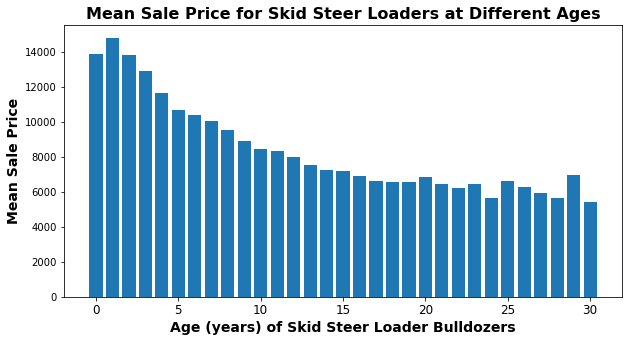

In [67]:
 #Bar plot of the same
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(age_data_ssl['Age_at_Sale'], age_data_ssl['SalePrice'])
plt.xlabel('Age (years) of Skid Steer Loader Bulldozers', size=14, weight='bold')
plt.xticks(size=12)
plt.ylabel('Mean Sale Price', size=14, weight='bold')
plt.xticks( size=12)
plt.title('Mean Sale Price for Skid Steer Loaders at Different Ages', size=16, weight='bold')
plt.show();


### How does the age of a bulldozer affect its sale price ? 

From the analysis performed above , it is apparent that the age of a bulldozer does affect it sale price across bulldozers of the same class types.  
**It is clear from the analysis that age and sale price of a bulldozer are negatively correlated.**

## Visualising the relationship between sale price across bulldozers of the same age, usage in hours and class type

### Filling the `MachineHoursCurrentMeter` feature column
In order to fill this column, I decided to leverage the relationship between `Age` and `MachineHoursCurrentMeter` of the bulldozers.  
- We can all intuite that the older a bulldozer is, the more use (in hours) that has been got out of the bulldozer.  

### Visualising & modelling the relationship between `Age` and `MachineHoursCurrentMeter`

#### Dropping all the rows containing missing values as they will not contribute towards modelling the relationship of there two feature variables

In [69]:
df_age_use = df[df['MachineHoursCurrentMeter'].notna()]
df_age_use = df.groupby(['Age_at_Sale']).mean().reset_index()
df_age_use = df_age_use[['Age_at_Sale', 'MachineHoursCurrentMeter']]
df_age_use = df_age_use.sort_values(by='Age_at_Sale')
df_age_use.head()

,Age_at_Sale,MachineHoursCurrentMeter
0,0,446.666667
1,1,662.821761
2,2,1456.281458
3,3,2167.379676
4,4,3379.357632


In [70]:
# Confirming that there are no more missing values in this dataframe
df_age_use.isnull().sum()

Age_at_Sale                 0
MachineHoursCurrentMeter    0
dtype: int64

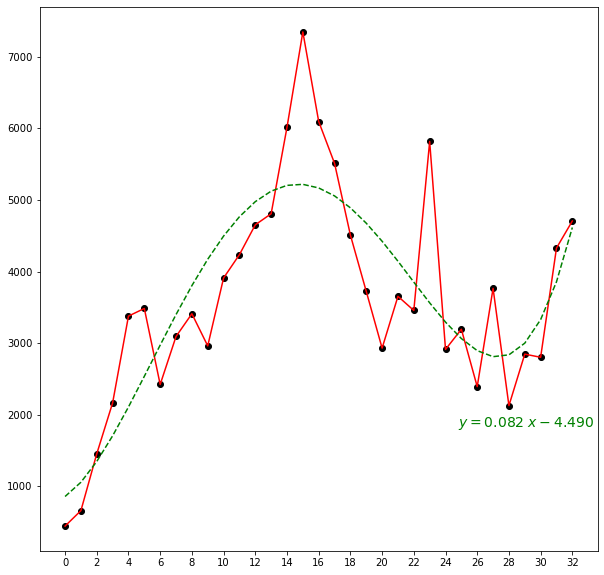

In [71]:
# Plotting the two features to visualise their relationship
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], color='black')
plt.plot(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], color='red')
plt.xticks(np.arange(min(df_age_use['Age_at_Sale']), max(df_age_use['Age_at_Sale'])+5, 2))
plt.title('The Usage (in hours) of a Bulldozer as a function of its Age (in years)')
plt.xlabel('Age of the Bulldozer in years')
plt.ylabel('Machine Operational Hours')
plt.show();

The simple line plot above higlights that generally, as the age of the bulldozer goes up , so does its accumulated worked hours.  

Question is, what is the magnitude and nature of this positive correlation.

### Modelling the relationship between Age and Machine Worked Hours using a `Regression` model.
- Here I will model the relationship betweeen the two variables using regression functions of increasing orders and then use the model will the lowest R^2 score as the model to fill in the missing `MachineHoursCurrentMeter` column in the dataset

In [72]:
from sklearn.metrics import r2_score

for i in range(1,10):
    z = np.polyfit(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], i)
    y_hat = np.poly1d(z)
    print(f"Order {i} regression model R^2 score = {r2_score(df_age_use['MachineHoursCurrentMeter'], y_hat(df_age_use['Age_at_Sale']))}")


Order 1 regression model R^2 score = 0.08263774161413895
Order 2 regression model R^2 score = 0.4667728295192528
Order 3 regression model R^2 score = 0.5899799944276216
Order 4 regression model R^2 score = 0.6840951113044631
Order 5 regression model R^2 score = 0.6934123599042332
Order 6 regression model R^2 score = 0.711692340590225
Order 7 regression model R^2 score = 0.7277463498516594
Order 8 regression model R^2 score = 0.7574318812406309
Order 9 regression model R^2 score = 0.8197800182675311


In [73]:
# Creating functions of order 1 through 9 that model the data above
z1 = np.polyfit(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], 1)
y1_hat = np.poly1d(z1)

z2 = np.polyfit(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], 2)
y2_hat = np.poly1d(z2)

z3 = np.polyfit(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], 3)
y3_hat = np.poly1d(z3)

z4 = np.polyfit(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], 4)
y4_hat = np.poly1d(z4)

z5 = np.polyfit(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'],5 )
y5_hat = np.poly1d(z5)

z6 = np.polyfit(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], 6)
y6_hat = np.poly1d(z6)

z7 = np.polyfit(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], 7)
y7_hat = np.poly1d(z7)

z8 = np.polyfit(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], 8)
y8_hat = np.poly1d(z8)

z9 = np.polyfit(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], 9)
y9_hat = np.poly1d(z9)

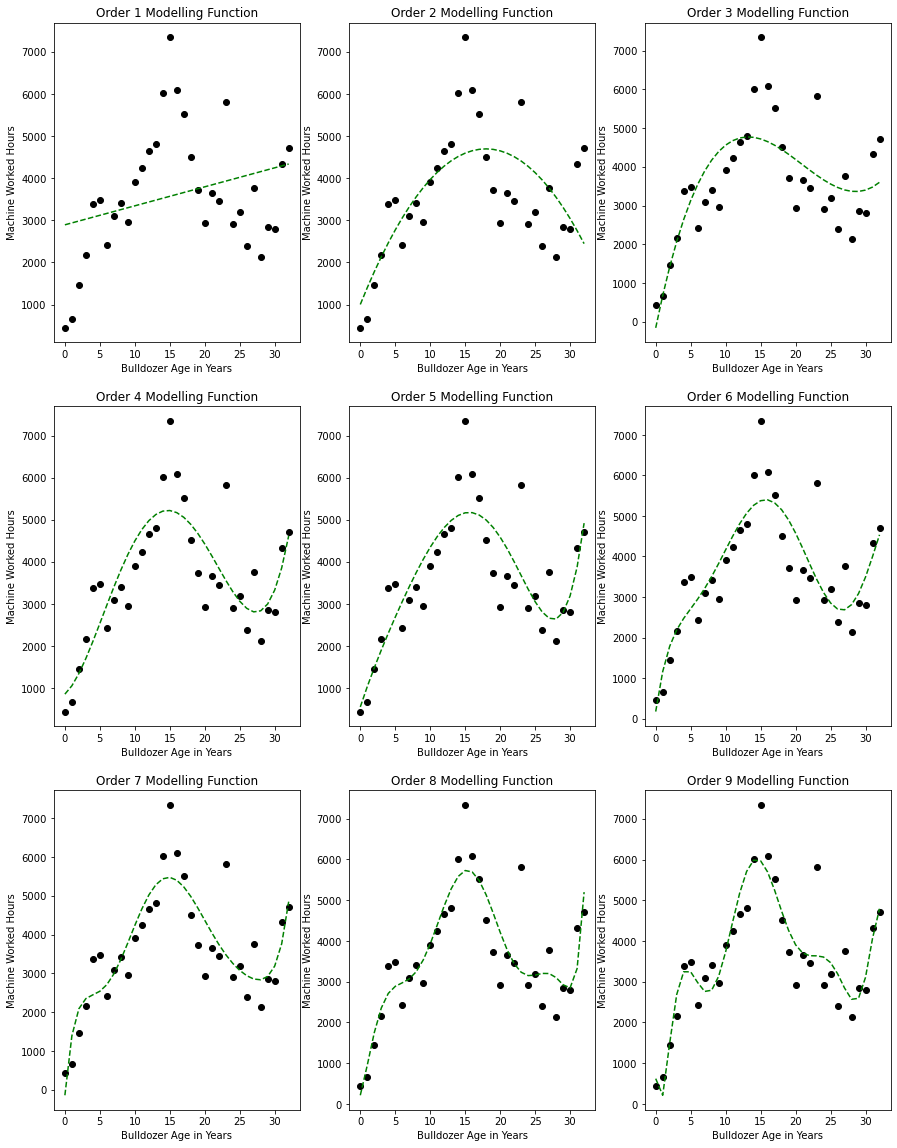

In [74]:
fig, ax = plt.subplots(3, 3, figsize=(15,20))
ax[0,0].plot(df_age_use['Age_at_Sale'], y1_hat(df_age_use['Age_at_Sale']), "g--")
ax[0,0].scatter(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], color='black')
ax[0,1].plot(df_age_use['Age_at_Sale'], y2_hat(df_age_use['Age_at_Sale']), "g--")
ax[0,1].scatter(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], color='black')
ax[0,2].plot(df_age_use['Age_at_Sale'], y3_hat(df_age_use['Age_at_Sale']), "g--")
ax[0,2].scatter(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], color='black')
ax[1,0].plot(df_age_use['Age_at_Sale'], y4_hat(df_age_use['Age_at_Sale']), "g--")
ax[1,0].scatter(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], color='black')
ax[1,1].plot(df_age_use['Age_at_Sale'], y5_hat(df_age_use['Age_at_Sale']), "g--")
ax[1,1].scatter(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], color='black')
ax[1,2].plot(df_age_use['Age_at_Sale'], y6_hat(df_age_use['Age_at_Sale']), "g--")
ax[1,2].scatter(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], color='black')
ax[2,0].plot(df_age_use['Age_at_Sale'], y7_hat(df_age_use['Age_at_Sale']), "g--")
ax[2,0].scatter(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], color='black')
ax[2,1].plot(df_age_use['Age_at_Sale'], y8_hat(df_age_use['Age_at_Sale']), "g--")
ax[2,1].scatter(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], color='black')
ax[2,2].plot(df_age_use['Age_at_Sale'], y9_hat(df_age_use['Age_at_Sale']), "g--")
ax[2,2].scatter(df_age_use['Age_at_Sale'], df_age_use['MachineHoursCurrentMeter'], color='black')
order = 1
for x in range(0,3):
    for y in range(0,3):
        ax[x,y].set_title("Order " + str(order) + " Modelling Function")
        ax[x,y].set_ylabel("Machine Worked Hours")
        ax[x,y].set_xlabel("Bulldozer Age in Years")
        order += 1
plt.show();

I opted to proceed the investigation using the `3rd Order Regression Function` to model the relationship between *Age_at_Sale* and the *MachineHoursCurrentMeter* since it followed the trends in the data without excessive overfitting that is seen from the 4th order functions and up

## Filling in the `MachineHoursCurrentMeter` column using the univariate regression function of order 3

In [75]:
# Getting the `Age_at_Sale` columns that we require a `MachineHoursCurrentMeter` value
to_predict = df[['Age_at_Sale', 'MachineHoursCurrentMeter']][df['MachineHoursCurrentMeter'].isna()]
to_predict.head()

,Age_at_Sale,MachineHoursCurrentMeter
274835,9,NaN
212552,9,NaN
62755,5,NaN
81383,3,NaN
135376,2,NaN


In [76]:
to_predict.shape

(208857, 2)

In [77]:
# Getting the 'MachineHoursCurrentMeter' predictions for these Age values using the 3rd order regression function 
pred_hours = y3_hat(to_predict['Age_at_Sale'])
pred_hours = pd.DataFrame(pred_hours)
pred_hours.columns = ['predicted_hours']
pred_hours.head()

,predicted_hours
0,4395.025089
1,4395.025089
2,3130.081956
3,2071.249606
4,1418.921054


In [78]:
len(pred_hours)

208857

In [79]:
# Confirming there were no missing prediction values before imputing them to the main dataset
pred_hours.isna().sum()

predicted_hours    0
dtype: int64

In [80]:
# Assigning the predicted values to the 'MachineHoursCurrentMeter' column in the 'to_predict' dataframe
to_predict['MachineHoursCurrentMeter'] = y3_hat(to_predict['Age_at_Sale'])
to_predict.head()

,Age_at_Sale,MachineHoursCurrentMeter
274835,9,4395.025089
212552,9,4395.025089
62755,5,3130.081956
81383,3,2071.249606
135376,2,1418.921054


Looking at the first 5 rows of the predicted `MachineHoursCurrentMeter` values, it is seen that the predictions seem to be in line with expectation.

In [81]:
# Confirming there were no missing prediction values before imputing them to the main dataset
to_predict.isna().sum()

Age_at_Sale                 0
MachineHoursCurrentMeter    0
dtype: int64

In [82]:
# Filling in the missing values in the `MachineHoursCurrentMeter` column in the main dataset with the predicted values
df['MachineHoursCurrentMeter'] = df['MachineHoursCurrentMeter'].fillna(to_predict['MachineHoursCurrentMeter'])

In [83]:
# Confirming that all of the missing `MachineHoursCurrentMeter` entries have been filled in the main dataset
df['MachineHoursCurrentMeter'].isnull().sum()

0

In [84]:
# Viewing the range of 'MachineHoursCurrentMeter' values across the entire dataset
df['MachineHoursCurrentMeter'].describe()

count    3.339420e+05
mean     3.603569e+03
std      1.660993e+04
min     -1.548782e+02
25%      1.418921e+03
50%      3.545913e+03
75%      4.395025e+03
max      2.483300e+06
Name: MachineHoursCurrentMeter, dtype: float64

Analysing the minimum value of the 'MachineHoursCurrentMeter' exposes one of the errors made by the regressor function used to predict the 'MachineHoursCurrentMeter' values for bulldozers of age = 0 years.  

In order to fix this, I simply **assigned a value of 0 hours to any 'MachineHoursCurrentMeter' with a value less than 0.**

In [85]:
for x in range (len(df)):
    if df['MachineHoursCurrentMeter'].iloc[x] < 0:
        df['MachineHoursCurrentMeter'].iloc[x] = 0

# Viewing the ammended column value range
df['MachineHoursCurrentMeter'].describe()

/Users/JJ/Desktop/MLProjects/End2EndNotebooks/env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


count    3.339420e+05
mean     3.603793e+03
std      1.660988e+04
min      0.000000e+00
25%      1.418921e+03
50%      3.545913e+03
75%      4.395025e+03
max      2.483300e+06
Name: MachineHoursCurrentMeter, dtype: float64

### Grouping the data so that I can analyse the relationship between sale price and bulldozer class type for bulldozers of the same age and usage.

In [86]:
acu_data = df.groupby(['ProductGroupDesc', 'Age_at_Sale', 'MachineHoursCurrentMeter']).mean()['SalePrice'].reset_index()
acu_data.head(5)

,ProductGroupDesc,Age_at_Sale,MachineHoursCurrentMeter,SalePrice
0,Backhoe Loaders,0,0.0,27160.447761
1,Backhoe Loaders,0,47.0,38000.000000
2,Backhoe Loaders,0,50.0,23000.000000
3,Backhoe Loaders,0,81.0,26000.000000
4,Backhoe Loaders,0,296.0,38000.000000


### Comparing the sale prices of different classes of bulldozers that are the same age and have around the same amount of usage (MachineHoursCurrentMeter values)

In [87]:
acu_data.sort_values(by='SalePrice', ascending=False).head(20)

,ProductGroupDesc,Age_at_Sale,MachineHoursCurrentMeter,SalePrice
10294,Motor Graders,2,1558.0,142000.0
10764,Motor Graders,6,4306.0,142000.0
10917,Motor Graders,7,7990.0,141000.0
10635,Motor Graders,5,4811.0,141000.0
10370,Motor Graders,3,2442.0,141000.0
10333,Motor Graders,3,943.0,141000.0
10624,Motor Graders,5,4515.0,141000.0
10296,Motor Graders,2,1637.0,141000.0
10416,Motor Graders,3,4630.0,141000.0
10670,Motor Graders,5,6137.0,140000.0


## Answering the 2nd Business Question
### What is the sale price variation across bulldozer classes at the same age at sale ?
The table above highlights that on average the rankings for the bulldozer classes of the same age ito mean sale price is:
1. Motor Graders.
2. Wheel Loaders.
3. Tractors.
4. Excavators.
5. BackHoe Loaders.
6. Skid Steer Loaders.

### Take-Aways
Of all the bulldozer classes, `Motor graders` seem to hold their values best over the course of their lifetime usage.  
A company looking to sell bulldozers may consider filling most of their inventory with Motor graders.

## Determining the best time to sell a bulldozer

#### Determining the month in which most sales occured

In [88]:
month_count = df['saleMonth'].value_counts().reset_index()
month_count.columns = (['saleMonth','Count'])
month_count.sort_values(by='Count', ascending=False, inplace=True)
month_count

,saleMonth,Count
0,3,48049
1,2,46508
2,6,37319
3,9,35326
4,12,33047
5,5,24864
6,10,23997
7,4,23227
8,11,21204
9,8,18524


The sorted table above highlights that the months of **March & February** respectively are the most popular months to buy/sell a bulldozer on average.

#### Determining the day of the week in which most sales occured

In [89]:
day_count = df['saleDayOfWeek'].value_counts().reset_index()
day_count.columns = (['saleDayOfWeek','Count'])
day_count.sort_values(by='Count', ascending=False, inplace=True)
day_count

,saleDayOfWeek,Count
0,3,99728
1,2,76365
2,1,62307
3,4,35753
4,5,34374
5,0,19976
6,6,5439


The most popular days of sell/buy a bulldozer are **Thursday, Wednesday & Tuesday** respectively

#### Naively ranking the months by average sale price

In [90]:
month_sales = df.groupby('saleMonth').mean()['SalePrice'].reset_index()
month_sales.sort_values(by='SalePrice', ascending=False, inplace=True)
month_sales

,saleMonth,SalePrice
1,2,35810.326309
0,1,35762.773961
4,5,34363.656491
3,4,33971.801481
2,3,33819.728215
9,10,33663.763179
10,11,33344.331305
5,6,33090.335191
6,7,32880.556224
7,8,32752.122922


This finding, although naive in nature, indicated that the months of **February, January & May** respectively, recorded the highest mean bulldozer sale price on average.  
**It was noted that there was very little variation in mean sale prices across the months of the year, which could point to an insignificant correlation between sale month and sale price generally speaking.**

#### Naively ranking the days of the week by average sale price

In [91]:
day_sales = df.groupby('saleDayOfWeek').mean()['SalePrice'].reset_index()
day_sales.sort_values(by='SalePrice', ascending=False, inplace=True)
day_sales

,saleDayOfWeek,SalePrice
0,0,35353.349019
1,1,34435.912337
3,3,34379.174485
2,2,34194.792483
6,6,32869.943593
4,4,32625.215003
5,5,29126.651073


This naive ranking reveals that there is not a significant variance in mean bulldozer sale price among the days of the week.**This could point to an insignificant correlation between the day of the sale and sale price generally speaking**. 

#### Ranking the months by their mean recorded sale price for bulldozers of similar class types

In [92]:
class_month_data = df.groupby(['ProductGroupDesc', 'saleMonth']).mean()['SalePrice'].reset_index()
class_month_data

,ProductGroupDesc,saleMonth,SalePrice
0,Backhoe Loaders,1,23100.089185
1,Backhoe Loaders,2,22789.427549
2,Backhoe Loaders,3,21685.216177
3,Backhoe Loaders,4,20669.097799
4,Backhoe Loaders,5,21265.614161
5,Backhoe Loaders,6,21137.066809
6,Backhoe Loaders,7,21221.823630
7,Backhoe Loaders,8,22342.094241
8,Backhoe Loaders,9,21236.418792
9,Backhoe Loaders,10,21555.499902


In [93]:
# Focusing on the Motor Graders
mg_cmd = class_month_data[class_month_data['ProductGroupDesc'] == 'Motor Graders'].sort_values(by='SalePrice', ascending=False)
mg_cmd

,ProductGroupDesc,saleMonth,SalePrice
12,Motor Graders,1,68130.044510
22,Motor Graders,11,64612.600454
16,Motor Graders,5,64234.313124
18,Motor Graders,7,63938.977072
14,Motor Graders,3,63512.323517
19,Motor Graders,8,63100.349162
13,Motor Graders,2,62167.849174
20,Motor Graders,9,61997.500000
15,Motor Graders,4,61963.941019
17,Motor Graders,6,61814.316126


In [94]:
# Focusing on the Wheel Loaders
wl_cmd = class_month_data[class_month_data['ProductGroupDesc'] == 'Wheel Loader'].sort_values(by='SalePrice', ascending=False)
wl_cmd

,ProductGroupDesc,saleMonth,SalePrice
60,Wheel Loader,1,47487.218254
63,Wheel Loader,4,43773.648457
70,Wheel Loader,11,43465.258569
69,Wheel Loader,10,43378.664170
62,Wheel Loader,3,43353.050313
67,Wheel Loader,8,43063.693356
65,Wheel Loader,6,42771.594005
61,Wheel Loader,2,42480.313570
71,Wheel Loader,12,42402.396080
64,Wheel Loader,5,42401.019744


In [95]:
# Focusing on the Track Type Tractors
ttt_cmd = class_month_data[class_month_data['ProductGroupDesc'] == 'Track Type Tractors'].sort_values(by='SalePrice', ascending=False)
ttt_cmd

,ProductGroupDesc,saleMonth,SalePrice
49,Track Type Tractors,2,43048.120122
48,Track Type Tractors,1,43007.140659
52,Track Type Tractors,5,42703.947072
51,Track Type Tractors,4,42029.515132
50,Track Type Tractors,3,41793.339849
58,Track Type Tractors,11,41270.079156
53,Track Type Tractors,6,41172.604339
57,Track Type Tractors,10,40801.958651
55,Track Type Tractors,8,40604.725751
59,Track Type Tractors,12,40171.773572


In [96]:
# Focusing on the Track Excavators
te_cmd = class_month_data[class_month_data['ProductGroupDesc'] == 'Track Excavators'].sort_values(by='SalePrice', ascending=False)
te_cmd

,ProductGroupDesc,saleMonth,SalePrice
36,Track Excavators,1,40494.605219
37,Track Excavators,2,39696.338072
39,Track Excavators,4,39554.471441
42,Track Excavators,7,39042.506418
40,Track Excavators,5,38832.147310
38,Track Excavators,3,38602.666013
46,Track Excavators,11,37630.310159
43,Track Excavators,8,37517.988961
41,Track Excavators,6,37445.392229
47,Track Excavators,12,37225.019754


In [97]:
# Focusing on the Backhoe Loaders
bl_cmd = class_month_data[class_month_data['ProductGroupDesc'] == 'Backhoe Loaders'].sort_values(by='SalePrice', ascending=False)
bl_cmd

,ProductGroupDesc,saleMonth,SalePrice
0,Backhoe Loaders,1,23100.089185
1,Backhoe Loaders,2,22789.427549
7,Backhoe Loaders,8,22342.094241
2,Backhoe Loaders,3,21685.216177
9,Backhoe Loaders,10,21555.499902
11,Backhoe Loaders,12,21517.900407
10,Backhoe Loaders,11,21478.545564
4,Backhoe Loaders,5,21265.614161
8,Backhoe Loaders,9,21236.418792
6,Backhoe Loaders,7,21221.823630


In [98]:
# Focusing on the Skid Steer Loader
ssl_cmd = class_month_data[class_month_data['ProductGroupDesc'] == 'Skid Steer Loaders'].sort_values(by='SalePrice', ascending=False)
ssl_cmd

,ProductGroupDesc,saleMonth,SalePrice
24,Skid Steer Loaders,1,11576.749781
25,Skid Steer Loaders,2,11411.777428
33,Skid Steer Loaders,10,10866.601124
30,Skid Steer Loaders,7,10857.116564
32,Skid Steer Loaders,9,10742.179158
27,Skid Steer Loaders,4,10712.548263
26,Skid Steer Loaders,3,10660.807679
28,Skid Steer Loaders,5,10637.431810
34,Skid Steer Loaders,11,10572.787345
31,Skid Steer Loaders,8,10531.973899


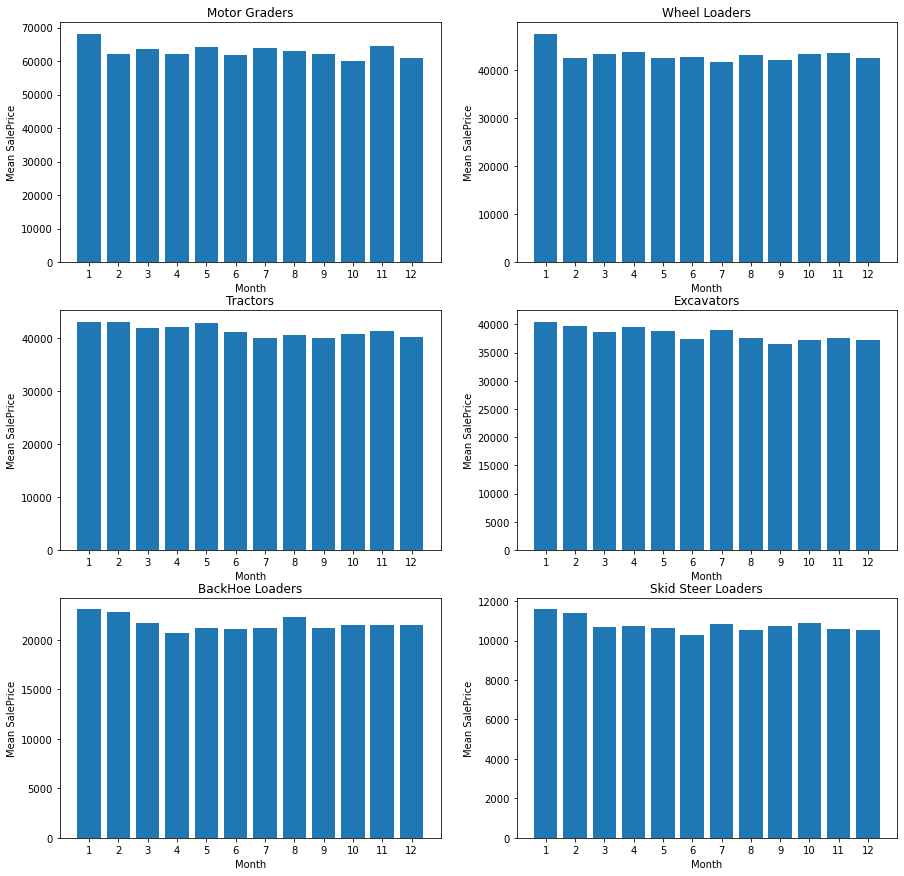

In [99]:
# Plotting the variation in mean sale prices across the months of the year for each of the bulldozer class types 

fig, ax = plt.subplots(3, 2, figsize = (15, 15))

ax[0,0].bar(mg_cmd['saleMonth'], mg_cmd['SalePrice'])
ax[0,0].set_xticks(np.arange(1, 13, 1))
ax[0,0].set_xlabel('Month')
ax[0,0].set_ylabel('Mean SalePrice')
ax[0,0].set_title('Motor Graders')

ax[0,1].bar(wl_cmd['saleMonth'], wl_cmd['SalePrice'])
ax[0,1].set_xticks(np.arange(1, 13, 1))
ax[0,1].set_xlabel('Month')
ax[0,1].set_ylabel('Mean SalePrice')
ax[0,1].set_title('Wheel Loaders')

ax[1,0].bar(ttt_cmd['saleMonth'], ttt_cmd['SalePrice'])
ax[1,0].set_xticks(np.arange(1, 13, 1))
ax[1,0].set_xlabel('Month')
ax[1,0].set_ylabel('Mean SalePrice')
ax[1,0].set_title('Tractors')

ax[1,1].bar(te_cmd['saleMonth'], te_cmd['SalePrice'])
ax[1,1].set_xticks(np.arange(1, 13, 1))
ax[1,1].set_xlabel('Month')
ax[1,1].set_ylabel('Mean SalePrice')
ax[1,1].set_title('Excavators')

ax[2,0].bar(bl_cmd['saleMonth'], bl_cmd['SalePrice'])
ax[2,0].set_xticks(np.arange(1, 13, 1))
ax[2,0].set_xlabel('Month')
ax[2,0].set_ylabel('Mean SalePrice')
ax[2,0].set_title('BackHoe Loaders')

ax[2,1].bar(ssl_cmd['saleMonth'], ssl_cmd['SalePrice'])
ax[2,1].set_xticks(np.arange(1, 13, 1))
ax[2,1].set_xlabel('Month')
ax[2,1].set_ylabel('Mean SalePrice')
ax[2,1].set_title('Skid Steer Loaders')

plt.show();

## Answering the 3rd Business Question
### When is the best time in the year to sell a bulldozer ? 
The analysis above revelaed that :
- The months of March and February respectively, recoreded the highest number of sales across the 30 years.
- The months of February, January and May respectively, recorded the highest mean sale price of a bulldozer in general.
- Thursday was the day in which most of the sales were undertaken across the thirty years.
- There was no significant relationship between the day of week in which a sale were underatken and the mean sale price
- Across each and every individual bulldozer class type, the months of January and February recorded the highest mean sale price for the repsective bulldozer class types

### Take-Aways
In general the best time of the year to sell a bulldozer according to the class their belong to are as follows:
1. Motor Graders - January
2. Wheel Loaders - January
3. Tractors - January & February
4. Excavators - January
5. BackHoe Loaders - January, February and August
6. Skid Steer Loaders - January & February

In general the best day of the week to sell a bulldozer is on a Thursday.


## 7. Data Pre-processing
### Revisiting the Correlation Matrix

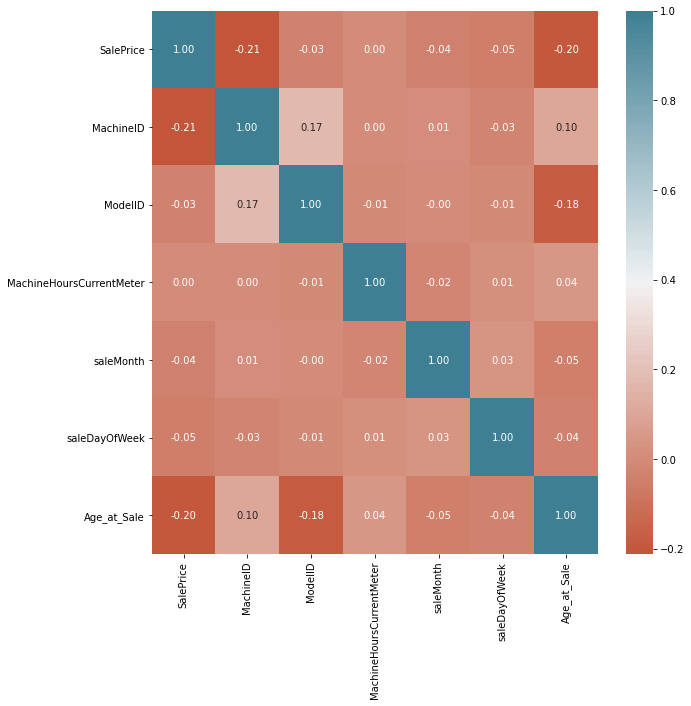

In [100]:
# Plotting the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt='.2f');
plt.show();

### Filtering the Numerical Features Prior to Modelling
Before I proceeded to the modelling section, I decided to drop some of the numerical feature columns for the following reasons:
- ModelID -> This column contains identifier codes that identify bulldozers according to their model type. Despite the fact that this column has a strong negative correlation to the sale price, the `ProductGroupDesc` categorical feature column encapsulates this field hence I decided to drop it.
- MachineID -> Simply identifies a unique bulldozer during an auction and thus has no inherent effect on the sale price.


In [101]:
# Dropping the ModelID and MachineID columns
df = df.drop(['ModelID', 'MachineID'], axis=1)

### Revisiting the Categorical Features
### Ranking the categorical features by their proportion of missing values

In [102]:
# Checking for missing values in the categorical df
cat_nan_df = (cat_cols.isnull().sum() / cat_cols.shape[0]).reset_index()
cat_nan_df.columns = ['Feature', 'nan_proportion']
cat_nan_df.sort_values(by='nan_proportion', ascending=False, inplace=True)
cat_nan_df

,Feature,nan_proportion
22,Engine_Horsepower,0.954084
19,Blade_Extension,0.954084
27,Tip_Control,0.954084
24,Pushblock,0.954084
21,Enclosure_Type,0.954084
20,Blade_Width,0.954084
26,Scarifier,0.954072
32,Hydraulics_Flow,0.878835
31,Grouser_Tracks,0.878835
30,Coupler_System,0.878652


### Filtering the Categorical Features Prior to Modelling
Before I proceeded to the modelling section, I decided to drop some of the categorical feature columns for the following reasons:
- All features with a > 0.5 proporti0n of missing values -> This is beacuse they was no meaningful way to impute the missing values as these were categorical fields with more than 2 unique features.
- Coupler - This column indicates whcih type of coupler system the bulldozer uses and thus there is no way of imputing this column meaningfully in a short span of time.
- Hydraulics - Indicates the type oof hydraulic system used by the bulldozer. Contains 11 unique possible values and thus cannot be meaningfully imputed.
- Enclosure - There is no time efficient manner of retrieving this information for all of the bulldozers that do not have this inforamtion.
- fiBaseModel, fiProductClassDesc, fiModelDesc, ProductGroup - all these fields are best encapsulated by the `ProductGroupDesc` column.

In [103]:
# Removing categorical columns with a > 0.5 proportion of missing entries
cat_removal_list = list(cat_nan_df[cat_nan_df['nan_proportion'] >= 0.5]['Feature'])
df = df.drop(cat_removal_list, axis=1)

In [104]:
# Removing the remaining categorical columns
df = df.drop(['Forks', 'Coupler', 'fiSecondaryDesc', 'Hydraulics', 'Enclosure', 'fiModelDesc', 'fiBaseModel', 'fiProductClassDesc', 'ProductGroup'], axis=1)

In [105]:
df.head()

,SalePrice,MachineHoursCurrentMeter,state,ProductGroupDesc,saleMonth,saleDayOfWeek,Age_at_Sale
274835,14000.0,4395.025089,Florida,Wheel Loader,1,1,9
212552,16000.0,4395.025089,Florida,Wheel Loader,1,1,9
62755,22000.0,3130.081956,Florida,Track Type Tractors,1,1,5
81383,31000.0,2071.249606,Florida,Wheel Loader,1,1,3
135376,63000.0,1418.921054,Florida,Track Type Tractors,1,1,2


### Encoding the `State` and the `ProductGroupDesc` Categorical Columns

In [106]:
class_dummies = pd.get_dummies(df['ProductGroupDesc'])
class_dummies.head()

,Backhoe Loaders,Motor Graders,Skid Steer Loaders,Track Excavators,Track Type Tractors,Wheel Loader
274835,0,0,0,0,0,1
212552,0,0,0,0,0,1
62755,0,0,0,0,1,0
81383,0,0,0,0,0,1
135376,0,0,0,0,1,0


In [107]:
state_dummies = pd.get_dummies(df['state'])
state_dummies.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Unspecified,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
274835,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
212552,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62755,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81383,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
135376,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Concatenating these two dummy dataframes to the main dataframe

In [108]:
df = pd.concat([df, class_dummies], axis=1)
df = pd.concat([df, state_dummies], axis=1)
df.head()

,SalePrice,MachineHoursCurrentMeter,state,ProductGroupDesc,saleMonth,saleDayOfWeek,Age_at_Sale,Backhoe Loaders,Motor Graders,Skid Steer Loaders,Track Excavators,Track Type Tractors,Wheel Loader,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,...,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Unspecified,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
274835,14000.0,4395.025089,Florida,Wheel Loader,1,1,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
212552,16000.0,4395.025089,Florida,Wheel Loader,1,1,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62755,22000.0,3130.081956,Florida,Track Type Tractors,1,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81383,31000.0,2071.249606,Florida,Wheel Loader,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
135376,63000.0,1418.921054,Florida,Track Type Tractors,1,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
### Dropping the `State` and `ProductGroupDesc` columns
df = df.drop(['state', 'ProductGroupDesc'], axis = 1)
df.head()

,SalePrice,MachineHoursCurrentMeter,saleMonth,saleDayOfWeek,Age_at_Sale,Backhoe Loaders,Motor Graders,Skid Steer Loaders,Track Excavators,Track Type Tractors,Wheel Loader,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,...,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Unspecified,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
274835,14000.0,4395.025089,1,1,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
212552,16000.0,4395.025089,1,1,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62755,22000.0,3130.081956,1,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81383,31000.0,2071.249606,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
135376,63000.0,1418.921054,1,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Saving the dataframe for future use

In [110]:
df.to_csv("data/df_preprocessed.csv", index=False)

## 8. Modelling
### Models I will be using
For this investigation I will model the data using :
1. `Random Forest Regressor` (Member of the `Decision Tree` family of regression models)
2. `Ridge Regressor` (Member of the Linear model family)
3. `XGB Regressor` (Member of the `Gradient Boosted` family of regression models)

I will compare the performance of each of the models and use the model that will satisfy the evaluation criterion.

### Evaluating the models
I will use the **R^2 score & Mean Absolute Error** to evaluate the performance of each of the aforementioned models and pick the model with the highest R^2 score & lowest MAE score.

In [111]:
# Package imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

In [112]:
# Splitting the data into training and test sets

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 42)

In [113]:
# Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)
rfr_score = {'RFR R^2 Score': r2_score(y_test, rfr_preds), 'RFR MAE': mean_absolute_error(y_test, rfr_preds)}
print(rfr_score)

{'RFR R^2 Score': 0.4713448358628921, 'RFR MAE': 11667.643324961928}


In [114]:
# Ridge Regressor
ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_score = {'Ridge R^2 Score': r2_score(y_test, ridge_preds), 'Ridge MAE': mean_absolute_error(y_test, ridge_preds)}
print(ridge_score)

{'Ridge R^2 Score': 0.398943940657136, 'Ridge MAE': 13389.986051018872}


In [115]:
# XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_score = {'XGB R^2 Score': r2_score(y_test, xgb_preds), 'XGB MAE': mean_absolute_error(y_test, xgb_preds)}
print(xgb_score)

{'XGB R^2 Score': 0.4983187211408294, 'XGB MAE': 11806.388872639533}


/Users/JJ/Desktop/MLProjects/End2EndNotebooks/env/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Based on the results of the vanilla models , I opted to proceed with the **XGB Regressor**  

I also noted that the XGB model's R2 score of 0.4983 was quite poor and thus I proceeded to tune the model's hyperparameters in order to improve its predictive performance on the test data.

### Tuning the XGB Regressor for better performance
Here I used `RandomSearchCV` to tune the XGB Regressor's hyperparameters in order to improve the performance of the model wrt to its predictive power.

In [ ]:
# %%time
# from sklearn.model_selection import RandomizedSearchCV

# params = {"n_estimators": np.arange(10, 1000, 10),
#           "max_depth": [None, 3, 4, 6, 10],
#          "learning_rate":[0.01, 0.02, 0.05, 0.1]}

# # Instantiate RSCV model
# cv_model = RandomizedSearchCV(XGBRegressor(n_jobs=-1,
#                                            random_state = 42),
#                                            param_distributions = params,
#                                            n_iter = 25,
#                                            cv=2,
#                                            verbose=True)
# # Fitting the RSCV model
# #cv_model.fit(X_train, y_train)

In [ ]:
# Finding the best XGBoost model's hyperparameters
# cv_model.best_params_

In [ ]:
# Evaluating the best XGBoost  model
# print(f"R^2 score: {r2_score(y_test, cv_model.predict(X_test))}\nMAE score: {mean_absolute_error(y_test, cv_model.predict(X_test))}")

### The Results from the model tuning process
![](images/rscv)

**I perfomed the actual Randomized Search on a notebook in Google Colaboratory in order to use my time more efficiently**

### Training a new XGB Regression model using the identified best parameters from the RandomizedSearchCV


In [118]:
# Tuned XGBoost Regressor
xgb_tuned = XGBRegressor(n_estimators=830,
                        max_depth=10,
                        learning_rate=0.05)

xgb_tuned.fit(X_train, y_train)

# Making predictions
xgb_tuned_preds = xgb_tuned.predict(X_test)

#Evaluating the model
xgb_tuned_score = {'XGB R^2 Score': r2_score(y_test, xgb_tuned_preds), 'XGB MAE': mean_absolute_error(y_test, xgb_tuned_preds)}
print(xgb_tuned_score)

/Users/JJ/Desktop/MLProjects/End2EndNotebooks/env/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


{'XGB R^2 Score': 0.5147047364549389, 'XGB MAE': 11483.768264201226}


- The tuned XGB Regressor's R^2 score, although still relatively low, was an improvement over the vanilla XGB Regressor model.  

- The tuned XGB Regressor also demonstrated an improvement in mean absolute error as well.

### Summary of results

- Vanilla XGB Regressor : R^2 score = 0.498 and MAE = 11806  
    
- Tuned XGB Regressor: R^2 score = 0.515 and MAE = 11483

## Making a single prediction to test the model
I will predict the sale price of the bulldozer in the fourth row of the `df` dataframe and compare the result to the actual sale price

In [130]:
# Making a prediction using te tuned XGB Regressor
prediction = xgb_tuned.predict(df.drop('SalePrice', axis=1).iloc[4:5,:])
prediction[0]

61157.7

In [131]:
# Retrieving the true value of the sale price from the 4th row of the dataframe
true_value = df.SalePrice.iloc[4]
true_value

63000.0

The sample prediction result illustrated above higlights the model's predictive performance.

## Feature Importance
Feature importance seeks to establish which features had the most significant effect on the **target** feature that is to be predicted ->`SalesPrice`.  

The feature importance values represent the coefficients for the feature variables that the model learnt during training. The higher the value, the more significant of an effect it had towards the model's sale price prediction calculations.

In [132]:
#Finding the feature importance values of the tuned XGB Regressor model
xgb_tuned.feature_importances_

array([0.00479845, 0.00361426, 0.00421731, 0.02259813, 0.18158248,
       0.08661471, 0.30812103, 0.01261001, 0.00705272, 0.00627294,
       0.00736698, 0.0099398 , 0.01528599, 0.00695782, 0.02109445,
       0.00931407, 0.00490043, 0.00422379, 0.00645978, 0.00552904,
       0.00252024, 0.00578141, 0.00531229, 0.00450938, 0.00822344,
       0.00321863, 0.00639962, 0.00710725, 0.00666541, 0.0035046 ,
       0.00331255, 0.00396892, 0.00568581, 0.00843909, 0.00481814,
       0.00869488, 0.00727714, 0.0169471 , 0.0058243 , 0.00653419,
       0.01230615, 0.00775181, 0.00689191, 0.01514694, 0.00571563,
       0.00542848, 0.00547286, 0.00528278, 0.00211297, 0.00132784,
       0.00870971, 0.00290497, 0.00743188, 0.00701568, 0.00621999,
       0.00837737, 0.00185411, 0.0045932 , 0.007193  , 0.        ,
       0.00855352, 0.00571856, 0.01069193], dtype=float32)

In [144]:
# Visualising the feature importances

def plot_features(columns, importances , n):
    """
    This function plots a bar chart ilustrating each model training feature
    and the feature's corresponding feature importance value/coeffcient.
    The bar chart is sorted in descending order of importance.
    
    Parameters
    1.Columns - an array/list of the features used to train the model in the order that
    the features were passed through the model during training.
    2.Importances - an array/list of the trained model's coefficients
    3.The number of features you would like plotted on the bar chart
    """
    
    # Creating a dataframe that maps the feature with its corresponding coefficient
    df = (pd.DataFrame({"features":columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    #Plotting the features importances
    fig, ax =plt.subplots(figsize=(10,10))
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()
    
    return df

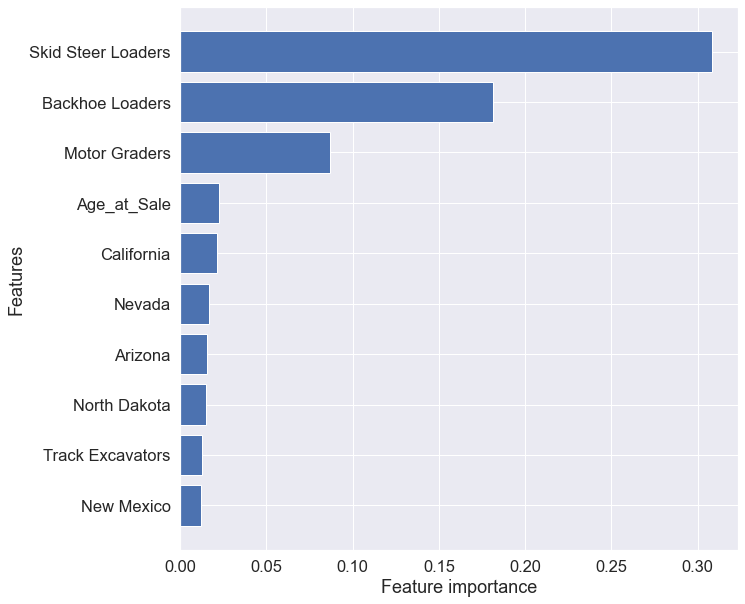

In [147]:
sns.set(font_scale = 1.5)
feature_importances = plot_features(X_train.columns, xgb_tuned.feature_importances_, n=10)

In [148]:
feature_importances.head(10)

,features,feature_importances
0,Skid Steer Loaders,0.308121
1,Backhoe Loaders,0.181582
2,Motor Graders,0.086615
3,Age_at_Sale,0.022598
4,California,0.021094
5,Nevada,0.016947
6,Arizona,0.015286
7,North Dakota,0.015147
8,Track Excavators,0.012610
9,New Mexico,0.012306


The feature importance results indicate that the features that were most crucial in determining the sale price of a bulldozer were:
1. The **model/class** of the bulldozer. 
2. The **age** of the bulldozer at sale.
3. The **state** in which the bulldozer in.

# Summary of Findings
## Final Remarks on Business Questions

### Question 1: What is the best State to sell a bulldozer in wrt sale price ?
The analysis done to answer this question revealed that **North Dakota** recorded the highest mean sale price across all the bulldozer classes.  
These findings may incentivise a company that re-sells used bulldozers to focus on selling their bulldozers in auctions held in North Dakota.

### Question 2: What is the sale price variation across diffferent bulldozer models of the same age and usage ?
The analysis done to answer this question revealed that the **Motor Grader** class of bulldozers had the highest mean sale price across all of the bulldozer classes of the same age and usage (hours).  

As mentioned earlier, these findings could suggest that a company should fill out most of their inventory with Motor Graders as this class of bulldozers generally sells for more on average.

### Question 3: What is the "best" time of the year to sell a bulldozer on average ?
The analysis revealed that on average, the month that recorded the highest mean sale price of bulldozers across all bulldozer classes, ages and uasge levels was the month of **February**  

Moreover, the analysis revealed that **Thursday** was the day that recorded the highest mean bulldozer sale price.

## Feature Importance Analysis
The feature importance analysis revealed that the features that most significantly determined the sale price of a bulldozer in the United States in descending order are:
1. The `Model/Class type` of the bulldozer.
2. The `Age` of the bulldozer at the time of the sale.
3. The `State` in which the bulldozer was sold in.